In [1]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns
import random
import os
sns.set(style="white")

# 한글 폰트 설정
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False ## 마이너스 부호 깨짐 방지

In [2]:
def set_random_seed(seed):
    np.random.seed(seed)
    random.seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)
    
random_seed = 1106
set_random_seed(random_seed)

|컬럼 |내용|
|---|---|
sessionID | 세션 ID|
userID | 사용자 ID|
TARGET | 세션에서 발생한 총 조회수|
browser | 사용된 브라우저|
OS | 사용된 기기의 운영체제|
device | 사용된 기기|
new | 첫 방문 여부 (0: 첫 방문 아님, 1: 첫 방문)|
quality | 세션의 질 (거래 성사를 기준으로 측정된 값, 범위: 1~100)|
duration | 총 세션 시간 (단위: 초)|
bounced | 이탈 여부 (0: 이탈하지 않음, 1: 이탈함)|
transaction | 세션 내에서 발생의 거래의 수|
transaction_revenue | 총 거래 수익|
continent | 세션이 발생한 대륙|
subcontinent | 세션이 발생한 하위 대륙|
country | 세션이 발생한 국가|
traffic_source | 트래픽이 발생한 소스|
traffic_medium | 트래픽 소스의 매체|
keyword | 트래픽 소스의 키워드, 일반적으로 traffic_medium이 organic, cpc인 경우에 설정|
referral_path | traffic_medium이 referral인 경우 설정되는 경로|

## 데이터 로드 

In [3]:
df = pd.read_csv("D:/3차프로젝트/Weblog_Data/train.csv")
test = pd.read_csv("D:/3차프로젝트/Weblog_Data/test.csv")

df.head()

,sessionID,userID,TARGET,browser,OS,device,new,quality,duration,bounced,transaction,transaction_revenue,continent,subcontinent,country,traffic_source,traffic_medium,keyword,referral_path
0,SESSION_000000,USER_000000,17.0,Chrome,Macintosh,desktop,0,45.0,839.0,0,0.0,0.0,Americas,Northern America,United States,google,organic,Category8,NaN
1,SESSION_000001,USER_000001,3.0,Chrome,Windows,desktop,1,1.0,39.0,0,0.0,0.0,Europe,Western Europe,Germany,google,organic,Category8,NaN
2,SESSION_000002,USER_000002,1.0,Samsung Internet,Android,mobile,1,1.0,0.0,1,0.0,0.0,Asia,Southeast Asia,Malaysia,(direct),(none),NaN,NaN
3,SESSION_000003,USER_000003,1.0,Chrome,Macintosh,desktop,1,1.0,0.0,1,0.0,0.0,Americas,Northern America,United States,Partners,affiliate,NaN,NaN
4,SESSION_000004,USER_000004,1.0,Chrome,iOS,mobile,0,1.0,0.0,1,0.0,0.0,Americas,Northern America,United States,groups.google.com,referral,NaN,Category6_Path_0000


## 데이터 EDA
keyword, referral_path 에서 결측치가 존재하는 것을 확인

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252289 entries, 0 to 252288
Data columns (total 19 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   sessionID            252289 non-null  object 
 1   userID               252289 non-null  object 
 2   TARGET               252289 non-null  float64
 3   browser              252289 non-null  object 
 4   OS                   252289 non-null  object 
 5   device               252289 non-null  object 
 6   new                  252289 non-null  int64  
 7   quality              252289 non-null  float64
 8   duration             252289 non-null  float64
 9   bounced              252289 non-null  int64  
 10  transaction          252289 non-null  float64
 11  transaction_revenue  252289 non-null  float64
 12  continent            252289 non-null  object 
 13  subcontinent         252289 non-null  object 
 14  country              252289 non-null  object 
 15  traffic_source   

In [5]:
# duration,transaction_revenue 등 값의 범위가 매우 크기 때문에 데이터 스케일링을 진행할 필요성이 있어보인다. 
df.describe()

,TARGET,new,quality,duration,bounced,transaction,transaction_revenue
count,252289.000000,252289.000000,252289.000000,252289.000000,252289.000000,252289.000000,2.522890e+05
mean,3.592626,0.751955,3.816805,113.104253,0.493672,0.009033,9.061248e+05
std,5.509465,0.431879,11.091028,330.876019,0.499961,0.100938,2.127689e+07
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000e+00
25%,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000e+00
50%,2.000000,1.000000,1.000000,3.000000,0.000000,0.000000,0.000000e+00
75%,4.000000,1.000000,1.000000,71.000000,1.000000,0.000000,0.000000e+00
max,386.000000,1.000000,98.000000,11186.000000,1.000000,12.000000,3.325712e+09


In [6]:
## userID에 중복이 존재한다. (나머지는 중복이 있지만, 카테고리.)
df.describe(include='object')

,sessionID,userID,browser,OS,device,continent,subcontinent,country,traffic_source,traffic_medium,keyword,referral_path
count,252289,252289,252289,252289,252289,252289,252289,252289,252289,252289,114614,91182
unique,252289,206024,70,21,3,6,23,205,168,7,623,1578
top,SESSION_000000,USER_002675,Chrome,Windows,desktop,Americas,Northern America,United States,google,organic,Category8,Category1
freq,1,78,174395,88119,167133,126506,111945,104201,116007,107370,103584,18687


In [7]:
test.describe()

,new,quality,duration,bounced,transaction,transaction_revenue
count,79786.000000,79786.000000,79786.000000,79786.000000,79786.000000,7.978600e+04
mean,0.734515,3.967576,121.550635,0.496804,0.007909,9.552892e+05
std,0.441594,11.349192,349.168791,0.499993,0.095260,2.714007e+07
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000e+00
25%,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000e+00
50%,1.000000,1.000000,2.000000,0.000000,0.000000,0.000000e+00
75%,1.000000,1.000000,75.000000,1.000000,0.000000,0.000000e+00
max,1.000000,98.000000,9316.000000,1.000000,7.000000,4.609835e+09


In [8]:
test.describe(include='object')

,sessionID,userID,browser,OS,device,continent,subcontinent,country,traffic_source,traffic_medium,keyword,referral_path
count,79786,79786,79786,79786,79786,79786,79786,79786,79786,79786,36716,25895
unique,79786,64535,45,16,3,6,23,192,97,7,211,980
top,SESSION_252289,USER_108579,Chrome,Windows,desktop,Americas,Northern America,United States,google,organic,Category8,Category1
freq,1,58,57503,28383,54730,40429,35465,33179,37210,35894,34598,6050


### 결측치
keyword, referral_path 결측치가 너무 많아 삭제하기에는 데이터 손실로 인하여 대체법 생각

In [9]:
df.isnull().sum()

sessionID                   0
userID                      0
TARGET                      0
browser                     0
OS                          0
device                      0
new                         0
quality                     0
duration                    0
bounced                     0
transaction                 0
transaction_revenue         0
continent                   0
subcontinent                0
country                     0
traffic_source              0
traffic_medium              0
keyword                137675
referral_path          161107
dtype: int64

In [10]:
test.isnull().sum()

sessionID                  0
userID                     0
browser                    0
OS                         0
device                     0
new                        0
quality                    0
duration                   0
bounced                    0
transaction                0
transaction_revenue        0
continent                  0
subcontinent               0
country                    0
traffic_source             0
traffic_medium             0
keyword                43070
referral_path          53891
dtype: int64

### 중복 데이터 확인

In [11]:
df.duplicated().sum()

0

In [12]:
test.duplicated().sum()

0

## 데이터 전처리

In [23]:
## 학습에 사용하지 않을 변수 제거
df.drop(['sessionID', 'userID', 'subcontinent', 'country'] , axis=1, inplace=True)
test.drop(['sessionID', 'userID', 'subcontinent', 'country'] , axis=1, inplace=True)

### 결측치 전처리

In [24]:
## keyword
df['keyword'].fillna("unknown",inplace=True)
test['keyword'].fillna("unknown",inplace=True)

## referral_path
df['referral_path'].fillna("unknown",inplace=True)
test['referral_path'].fillna("unknown",inplace=True)

### 데이터 스케일

#### quality 이상치 처리
- 로그변환으로 축소

In [25]:
### Train 데이터 전처리
df['quality'] = np.log1p(df['quality'])

### Test 데이터 전처리
test['quality'] = np.log1p(test['quality'])

#### transaction_revenue 이상치 처리
거래 수익이기 때문에 값의 범위를 조절하는 스케일링이 필수적 
- 로그변환으로 축소

In [26]:
### Train 데이터 전처리
df['transaction_revenue'] = np.log1p(df['transaction_revenue'])

### Test 데이터 전처리
test['transaction_revenue'] = np.log1p(test['transaction_revenue'])

#### duration 이상치 처리
- 로그변환으로 축소

In [27]:
### Train 데이터 전처리
df['duration'] = np.log1p(df['duration'])

### Test 데이터 전처리
test['duration'] = np.log1p(test['duration'])

### 범주형 전처리 (인코딩)

In [28]:
def browser_cleaning(data, browser_col):
    for i in browser_col:
        data.loc[data['browser'] == i, 'browser'] = 'unknown'
    return 

In [29]:
## train, test 데이터의 범위가 같아서 진행해도 됨
bb = test['browser'].value_counts().loc[:'Puffin'].index.tolist()
aa = df['browser'].value_counts().loc[:'Puffin'].index.tolist()

if str(aa).find(str(bb)):
    pass
else:
    print(f"{aa}값이 존재하지 않음")

In [30]:
## 상위 17개 browser 이후 데이터들은 다 unknown 처리
unknown_df = df['browser'].value_counts().iloc[17:].index.tolist()
unknown_test = test['browser'].value_counts().iloc[17:].index.tolist()

In [31]:
######### browser 전처리 #########

# train data browser 전처리
browser_cleaning(df, unknown_df)
print(len(df['browser'].value_counts()))

# test data browser 전처리
browser_cleaning(test, unknown_test)
print(len(test['browser'].value_counts()))

18
18


In [32]:
def os_cleaning(data, cleaning_type):
    
    #######  방법 1 unknown 으로 전처리  #######
    #######  방법 2 (not set)으로 전처리  #######
    
    not_in_col = data[~data['OS'].isin(os_col)].index
    
    data.loc[not_in_col, 'OS'] = cleaning_type
    
    return 

In [33]:
######### os 전처리 #########

# 유명한 os 
os_col = ['Windows', 'Macintosh', 'Android', 'iOS', 'Linux', 'Chrome OS','(not set)']

# train data OS 전처리
os_cleaning(df, '(not set)')
print(df['OS'].unique())

# test data OS 전처리
os_cleaning(test, '(not set)')
print(test['OS'].unique())

['Macintosh' 'Windows' 'Android' 'iOS' 'Linux' '(not set)' 'Chrome OS']
['Linux' 'iOS' 'Windows' 'Android' '(not set)' 'Macintosh' 'Chrome OS']


- device - 전처리 없이 사용
- continent - 전처리 없이 사용 
- subcontinent - 사용 X
- country - 사용 X
- traffic_medium

In [34]:
def traffic_cleaning(data):
    data.loc[data['traffic_source'].str.contains('google'), 'traffic_source'] = 'google'
    data.loc[data['traffic_source'].str.contains('youtube'), 'traffic_source'] = 'youtube'
    data.loc[data['traffic_source'].str.contains('facebook'), 'traffic_source'] = 'facebook'
    data.loc[data['traffic_source'].str.contains('yahoo'), 'traffic_source'] = 'yahoo'
    
    traffic_col = data['traffic_source'].value_counts().index[:5] ## 상위 5개

    not_in_traffic_col = data[~data['traffic_source'].isin(traffic_col)].index
    
    data.loc[not_in_traffic_col, 'traffic_source'] = "unknown"
    
    return 

In [35]:
######### traffic_source 전처리 #########

# train data traffic_source 전처리
traffic_cleaning(df)
print(df['traffic_source'].unique())

# test data traffic_source 전처리
traffic_cleaning(test)
print(test['traffic_source'].unique())

['google' '(direct)' 'Partners' 'youtube' 'unknown' 'facebook']
['(direct)' 'google' 'youtube' 'Partners' 'unknown' 'facebook']


In [36]:
def keyword_cleaning(data):
    
    tt = data['keyword'].tolist()
    data['keyword'] = [t.split("_")[0] for t in tt]
    
    return 

In [37]:
######### keyword 전처리 #########

# train data keyword 전처리
keyword_cleaning(df)
print(df['keyword'].unique())

# test data keyword 전처리
keyword_cleaning(test)
print(test['keyword'].unique())

['Category8' 'unknown' 'Category9' 'Category1' 'Category10' 'Category6'
 'Category2' 'Category11' 'Category4' 'Category3' 'Category5' 'Category12'
 'Category7']
['unknown' 'Category8' 'Category3' 'Category10' 'Category5' 'Category9'
 'Category1' 'Category4' 'Category11' 'Category2' 'Category6' 'Category12'
 'Category7']


In [38]:
def referral_cleaning(data):
    
    tt = data['referral_path'].tolist()
    data['referral_path'] = [t.split("_")[0] for t in tt]
    
    return 

In [39]:
######### keyword 전처리 #########

# train data keyword 전처리
referral_cleaning(df)
print(df['referral_path'].unique())

# test data keyword 전처리
referral_cleaning(test)
print(test['referral_path'].unique())

['unknown' 'Category6' 'Category7' 'Category5' 'Category11' 'Category8'
 'Category9' 'Category13' 'Category1' 'Category2' 'Category3' 'Category4'
 'Category12' 'Category10']
['Category1' 'unknown' 'Category2' 'Category11' 'Category3' 'Category10'
 'Category6' 'Category8' 'Category5' 'Category12' 'Category13' 'Category7'
 'Category9' 'Category4']


In [42]:
## 차원을 더 축소하기 위해서 , drop_first=True 옵션 적용 
dum_train = pd.get_dummies(df, drop_first=True)
dum_test = pd.get_dummies(test, drop_first=True)

In [43]:
dum_train

,TARGET,new,quality,duration,bounced,transaction,transaction_revenue,browser_Android Browser,browser_Android Webview,browser_Chrome,...,referral_path_Category13,referral_path_Category2,referral_path_Category3,referral_path_Category4,referral_path_Category5,referral_path_Category6,referral_path_Category7,referral_path_Category8,referral_path_Category9,referral_path_unknown
0,17.0,0,3.828641,6.733402,0,0.0,0.0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
1,3.0,1,0.693147,3.688879,0,0.0,0.0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
2,1.0,1,0.693147,0.000000,1,0.0,0.0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,1.0,1,0.693147,0.000000,1,0.0,0.0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
4,1.0,0,0.693147,0.000000,1,0.0,0.0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
252284,1.0,1,0.693147,0.000000,1,0.0,0.0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
252285,1.0,0,0.693147,0.000000,1,0.0,0.0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
252286,5.0,0,1.098612,4.248495,0,0.0,0.0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
252287,1.0,1,0.693147,3.367296,0,0.0,0.0,0,1,0,...,0,1,0,0,0,0,0,0,0,0


In [44]:
dum_test

,new,quality,duration,bounced,transaction,transaction_revenue,browser_Android Browser,browser_Android Webview,browser_Chrome,browser_Coc Coc,...,referral_path_Category13,referral_path_Category2,referral_path_Category3,referral_path_Category4,referral_path_Category5,referral_path_Category6,referral_path_Category7,referral_path_Category8,referral_path_Category9,referral_path_unknown
0,1,4.330733,6.549651,0,0.0,0.0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0.693147,0.000000,1,0.0,0.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,1,0.693147,3.526361,0,0.0,0.0,0,0,1,0,...,0,1,0,0,0,0,0,0,0,0
3,1,0.693147,4.343805,0,0.0,0.0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
4,1,1.098612,5.921578,0,0.0,0.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79781,1,0.693147,0.000000,1,0.0,0.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
79782,1,0.693147,0.000000,1,0.0,0.0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
79783,1,0.693147,3.135494,0,0.0,0.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
79784,1,0.693147,4.912655,0,0.0,0.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


## 데이터 분리 - Hold_out

In [45]:
## 데이터 분할
X = dum_train.drop(['TARGET'] , axis=1)
Y = dum_train.TARGET

In [46]:
from sklearn.model_selection import train_test_split

## 학습용 데이터 생성
x_train, x_valid, y_train, y_valid = train_test_split(X, Y, test_size=0.2, shuffle=True, random_state=1106)

## 모델 파트

In [47]:
from catboost import CatBoostRegressor
from sklearn.model_selection import RandomizedSearchCV, KFold
from scipy.stats import uniform, randint
from sklearn.metrics import make_scorer
from sklearn.metrics import mean_squared_error
import time

# RMSE 계산 함수 정의
def rmse(y_true, y_pred):
    return mean_squared_error(y_true, y_pred, squared=False)

In [48]:
# CatBoostRegressor 모델 생성
cbr_model = CatBoostRegressor(verbose=False)

# 랜덤 서치를 위한 하이퍼파라미터 공간 설정
param_space = {
    'learning_rate': uniform(0.01, 0.1),     # 학습 속도 범위
    'depth': randint(3, 10),                  # 트리의 깊이 범위
    'n_estimators': randint(100, 1000),        # 트리의 개수 범위
    'loss_function': ['RMSE'],
    'eval_metric': ['RMSE']
}

# 랜덤 서치를 위한 RandomizedSearchCV 객체 생성
random_search = RandomizedSearchCV(
    estimator=cbr_model,
    param_distributions=param_space,
    n_iter=20,             # 랜덤 서치의 반복 횟수 설정
    cv=KFold(n_splits=5),  # 교차 검증의 폴드 수 설정
    random_state=1106,
    scoring=make_scorer(rmse, greater_is_better=False)  # RMSE를 평가지표로 설정
)

# 랜덤 서치 수행 전 현재 시간 기록
start_time = time.time()

# 랜덤 서치와 교차 검증을 통한 모델 학습
random_search.fit(x_train, y_train)

# 랜덤 서치 수행 후 현재 시간 기록
end_time = time.time()

# 수행 시간 계산
elapsed_time = end_time - start_time

# 최적의 하이퍼파라미터
best_params = random_search.best_params_

# 최적의 하이퍼파라미터와 성능 출력
print("Best Hyperparameters:", random_search.best_params_)
print("Best Score (RMSE):", -random_search.best_score_)  # 음수로 출력된 RMSE 값을 양수로 변환하여 출력
print("랜덤 서치 수행 시간:", elapsed_time/60, "분")

Best Hyperparameters: {'depth': 8, 'eval_metric': 'RMSE', 'learning_rate': 0.09449462681059005, 'loss_function': 'RMSE', 'n_estimators': 187}
Best Score (RMSE): 2.839961087903373
랜덤 서치 수행 시간: 2.1442885398864746 분


In [49]:
# 모델 생성 시 하이퍼파라미터 설정
cbr_best_model = CatBoostRegressor(
    depth=best_params['depth'], 
    eval_metric=best_params['eval_metric'], 
    learning_rate=best_params['learning_rate'], 
    loss_function=best_params['loss_function'], 
    n_estimators=best_params['n_estimators']
)

# 학습
cbr_best_model.fit(x_train, y_train, verbose=False)

In [50]:
################# 랜덤 결과
# 훈련 세트의 예측값 계산
y_train_pred = cbr_best_model.predict(x_train)

# 검증 세트의 예측값 계산
y_valid_pred = cbr_best_model.predict(x_valid)

# RMSE 계산
train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
valid_rmse = np.sqrt(mean_squared_error(y_valid, y_valid_pred))

print("훈련 세트 RMSE: {:.2f}".format(train_rmse))
print("검증 세트 RMSE: {:.2f}".format(valid_rmse))

훈련 세트 RMSE: 2.54
검증 세트 RMSE: 2.58


In [51]:
from sklearn.metrics import r2_score

R2_train = r2_score(y_train, y_train_pred) # R2
R2_valid = r2_score(y_valid, y_valid_pred) # R2

print("훈련 세트 R2: {:.3f}".format(R2_train))
print("검증 세트 R2: {:.3f}".format(R2_valid))

훈련 세트 R2: 0.791
검증 세트 R2: 0.764


findfont: Font family ['Malgun Gothic'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Malgun Gothic'] not found. Falling back to DejaVu Sans.


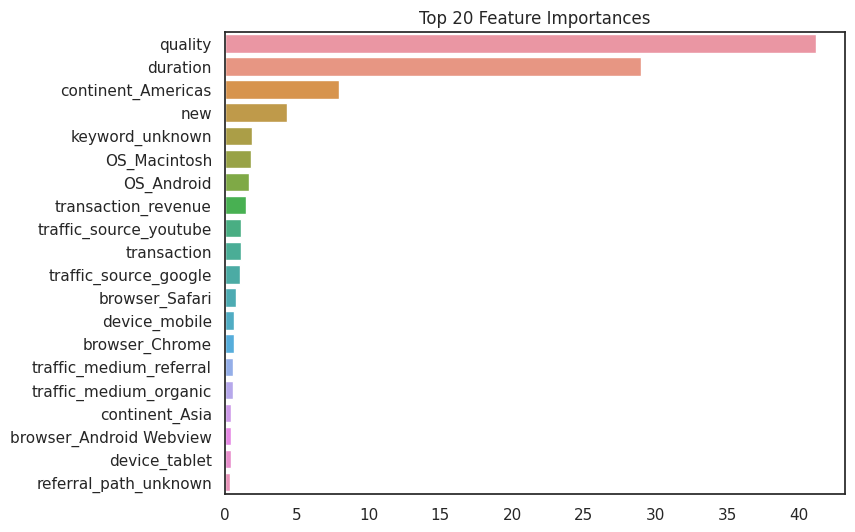

In [52]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

ftr_importances_values = cbr_best_model.feature_importances_
ftr_importances = pd.Series(ftr_importances_values, index = x_train.columns)
ftr_top20 = ftr_importances.sort_values(ascending=False)[:20]

plt.figure(figsize=(8,6))
plt.title('Top 20 Feature Importances')
sns.barplot(x=ftr_top20, y=ftr_top20.index)
plt.show()

In [53]:
preds = cbr_best_model.predict(dum_test)
preds[preds < 0] = 0 ## 0보다 작은 값은 0으로 수정

In [54]:
submission = pd.read_csv('/3차프로젝트/Weblog_Data/sample_submission.csv')
submission['TARGET'] = preds
submission

,sessionID,TARGET
0,SESSION_252289,23.632929
1,SESSION_252290,1.036470
2,SESSION_252291,2.900697
3,SESSION_252292,4.389318
4,SESSION_252293,11.687350
...,...,...
79781,SESSION_332070,0.986885
79782,SESSION_332071,1.074260
79783,SESSION_332072,2.773621
79784,SESSION_332073,4.983570


In [55]:
# submission.to_csv('./0220_3_submission.csv', index=False)

### 다중 공선성 확인

                    feature        VIF
0                   quality   6.110022
1                  duration  15.541193
2                   bounced  13.738143
3               transaction  10.765488
4       transaction_revenue  10.948478
..                      ...        ...
66  referral_path_Category6   2.048368
67  referral_path_Category7   4.863062
68  referral_path_Category8   6.874907
69  referral_path_Category9   1.869203
70    referral_path_unknown  15.907546

[71 rows x 2 columns]


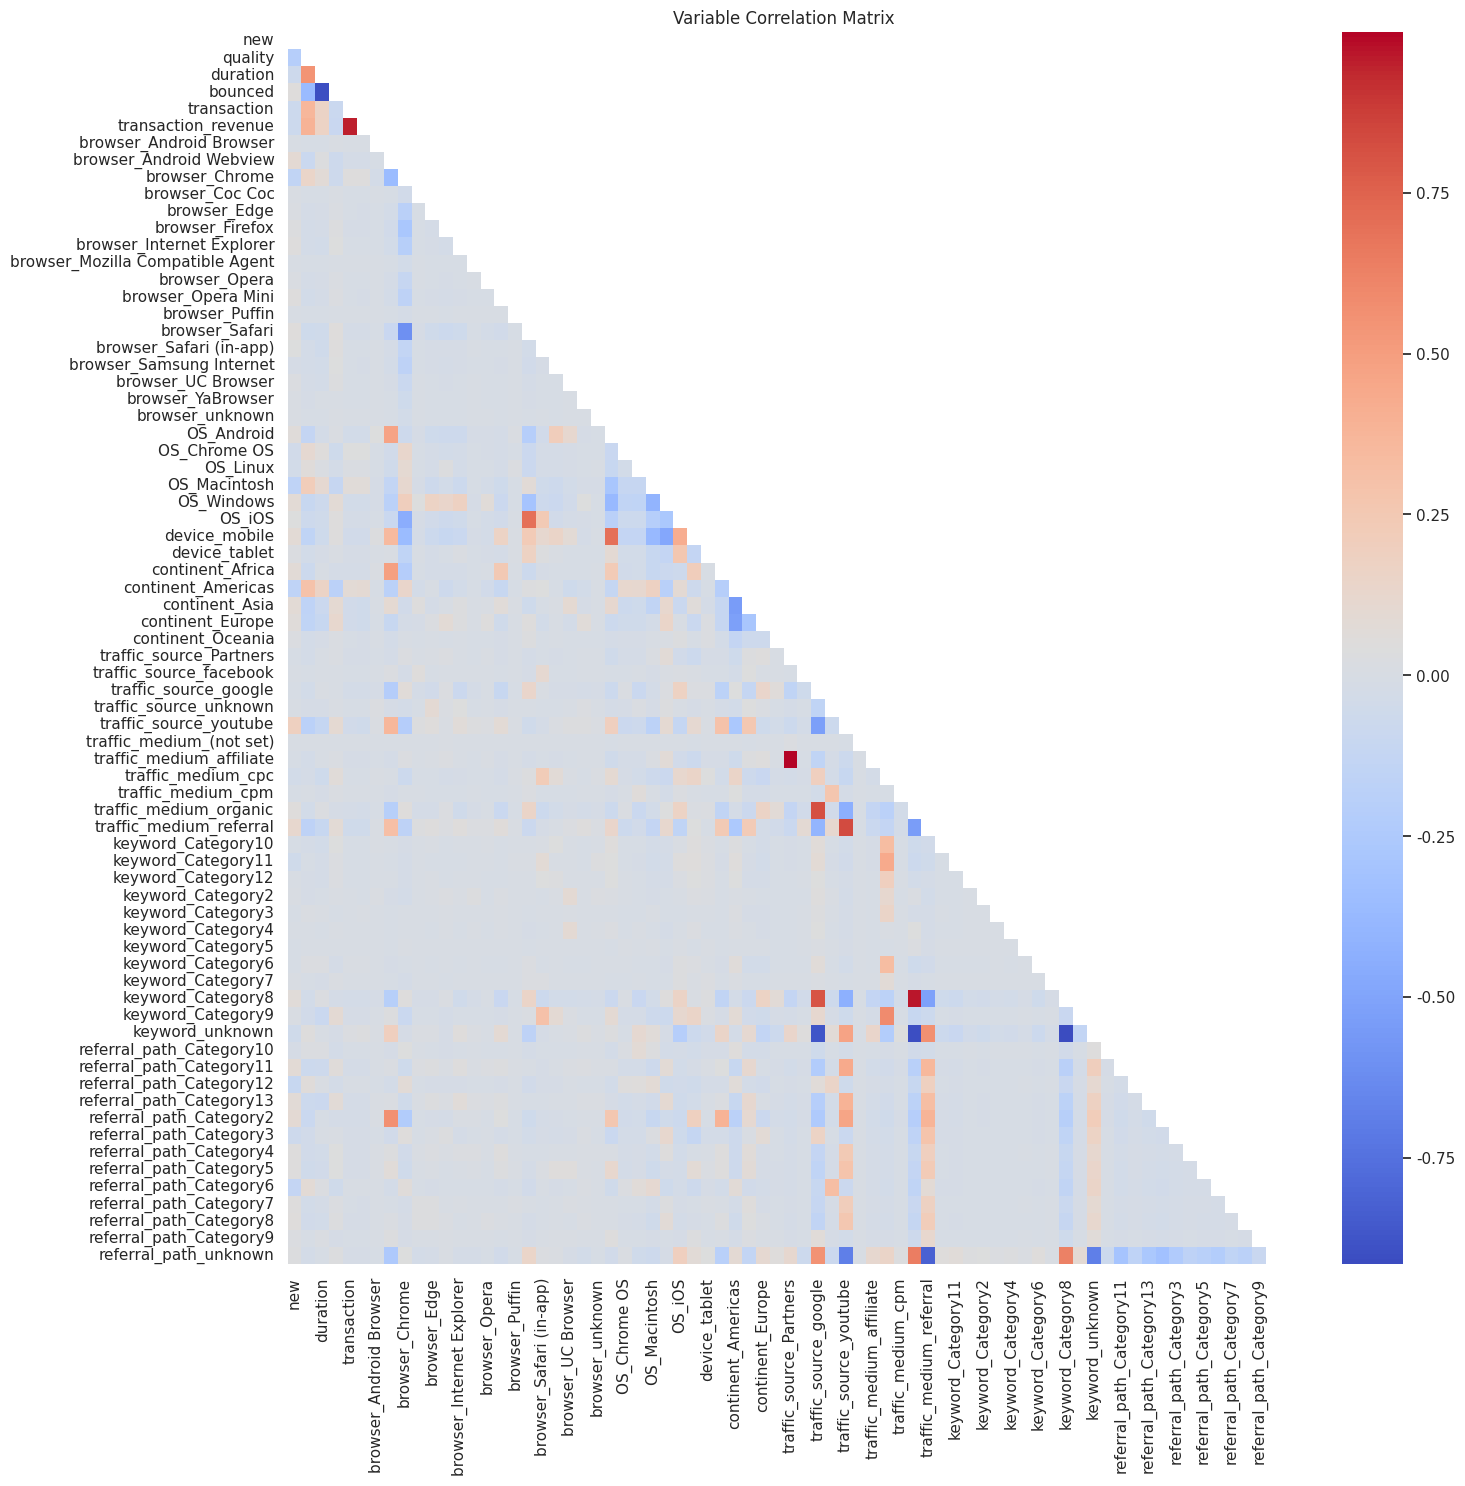

In [56]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

## 연속형만 추출
new_df = dum_train.select_dtypes(exclude='object').drop('TARGET',axis=1)

## 상관계수
correlation_matrix = new_df.corr()

## 대칭 결과이기 때문에 위쪽 부분 mask
mask = np.triu(np.ones_like(correlation_matrix))

selected_columns = new_df.columns.tolist()[1:]

# VIF 계산
vif_data = pd.DataFrame()
vif_data["feature"] = selected_columns
vif_data["VIF"] = [variance_inflation_factor(dum_train[selected_columns].values, i) for i in range(len(selected_columns))]

# VIF 출력
print(vif_data)

plt.figure(figsize=(16, 16))
sns.heatmap(correlation_matrix, cmap = 'coolwarm', mask = mask)
plt.title('Variable Correlation Matrix')
plt.show()

In [69]:
## VIF가 5이상인 컬럼 선택
cols = vif_data[vif_data['VIF'] > 10].feature.tolist()
cols

['duration',
 'bounced',
 'transaction',
 'transaction_revenue',
 'browser_Android Webview',
 'browser_Chrome',
 'browser_Edge',
 'browser_Firefox',
 'browser_Internet Explorer',
 'browser_Opera Mini',
 'browser_Safari',
 'OS_Android',
 'OS_Chrome OS',
 'OS_Linux',
 'OS_Macintosh',
 'OS_Windows',
 'OS_iOS',
 'device_mobile',
 'device_tablet',
 'continent_Africa',
 'continent_Americas',
 'continent_Asia',
 'continent_Europe',
 'traffic_source_Partners',
 'traffic_source_facebook',
 'traffic_source_google',
 'traffic_source_unknown',
 'traffic_source_youtube',
 'traffic_medium_affiliate',
 'traffic_medium_cpc',
 'traffic_medium_cpm',
 'traffic_medium_organic',
 'traffic_medium_referral',
 'keyword_Category8',
 'keyword_unknown',
 'referral_path_Category11',
 'referral_path_Category13',
 'referral_path_Category2',
 'referral_path_unknown']

In [70]:
# 다중공선성이 있는 컬럼 제거
selected_columns = dum_train.columns[~dum_train.columns.isin(cols)]

dum_train = dum_train[selected_columns]
dum_test = dum_test[selected_columns[1:]]

### 재구성

In [71]:
## 데이터 분할
X = dum_train.drop(['TARGET'] , axis=1)
Y = dum_train.TARGET

In [72]:
from sklearn.model_selection import train_test_split

## 학습용 데이터 생성
x_train, x_valid, y_train, y_valid = train_test_split(X, Y, test_size=0.2, shuffle=True, random_state=1106)

In [73]:
# CatBoostRegressor 모델 생성
cbr_model = CatBoostRegressor(verbose=False)

# 랜덤 서치를 위한 하이퍼파라미터 공간 설정
param_space = {
    'learning_rate': uniform(0.01, 0.1),     # 학습 속도 범위
    'depth': randint(3, 10),                  # 트리의 깊이 범위
    'n_estimators': randint(100, 1000),        # 트리의 개수 범위
    'loss_function': ['RMSE'],
    'eval_metric': ['RMSE']
}

# 랜덤 서치를 위한 RandomizedSearchCV 객체 생성
random_search = RandomizedSearchCV(
    estimator=cbr_model,
    param_distributions=param_space,
    n_iter=20,             # 랜덤 서치의 반복 횟수 설정
    cv=KFold(n_splits=5),  # 교차 검증의 폴드 수 설정
    random_state=1106,
    scoring=make_scorer(rmse, greater_is_better=False)  # RMSE를 평가지표로 설정
)

# 랜덤 서치 수행 전 현재 시간 기록
start_time = time.time()

# 랜덤 서치와 교차 검증을 통한 모델 학습
random_search.fit(x_train, y_train)

# 랜덤 서치 수행 후 현재 시간 기록
end_time = time.time()

# 수행 시간 계산
elapsed_time = end_time - start_time

# 최적의 하이퍼파라미터
best_params = random_search.best_params_

# 최적의 하이퍼파라미터와 성능 출력
print("Best Hyperparameters:", random_search.best_params_)
print("Best Score (RMSE):", -random_search.best_score_)  # 음수로 출력된 RMSE 값을 양수로 변환하여 출력
print("랜덤 서치 수행 시간:", elapsed_time/60, "분")

Best Hyperparameters: {'depth': 6, 'eval_metric': 'RMSE', 'learning_rate': 0.03630945811169836, 'loss_function': 'RMSE', 'n_estimators': 435}
Best Score (RMSE): 5.529836248031872
랜덤 서치 수행 시간: 1.589667522907257 분


In [74]:
# 모델 생성 시 하이퍼파라미터 설정
cbr_best_model = CatBoostRegressor(
    depth=best_params['depth'], 
    eval_metric=best_params['eval_metric'], 
    learning_rate=best_params['learning_rate'], 
    loss_function=best_params['loss_function'], 
    n_estimators=best_params['n_estimators']
)

# 학습
cbr_best_model.fit(x_train, y_train, verbose=False)

In [75]:
################# 랜덤 결과
# 훈련 세트의 예측값 계산
y_train_pred = cbr_best_model.predict(x_train)

# 검증 세트의 예측값 계산
y_valid_pred = cbr_best_model.predict(x_valid)

# RMSE 계산
train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
valid_rmse = np.sqrt(mean_squared_error(y_valid, y_valid_pred))

print("훈련 세트 RMSE: {:.2f}".format(train_rmse))
print("검증 세트 RMSE: {:.2f}".format(valid_rmse))

훈련 세트 RMSE: 5.53
검증 세트 RMSE: 5.27


In [76]:
from sklearn.metrics import r2_score

R2_train = r2_score(y_train, y_train_pred) # R2
R2_valid = r2_score(y_valid, y_valid_pred) # R2

print("훈련 세트 R2: {:.3f}".format(R2_train))
print("검증 세트 R2: {:.3f}".format(R2_valid))

훈련 세트 R2: 0.010
검증 세트 R2: 0.013


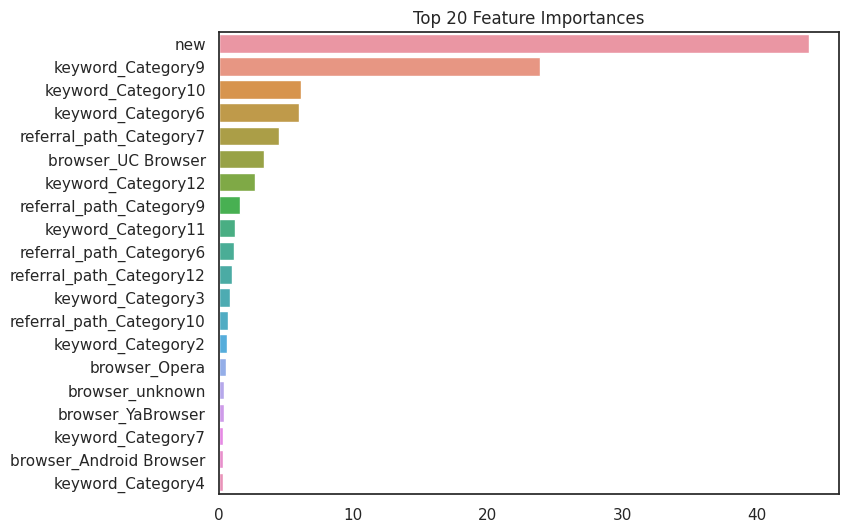

In [77]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

ftr_importances_values = cbr_best_model.feature_importances_
ftr_importances = pd.Series(ftr_importances_values, index = x_train.columns)
ftr_top20 = ftr_importances.sort_values(ascending=False)[:20]

plt.figure(figsize=(8,6))
plt.title('Top 20 Feature Importances')
sns.barplot(x=ftr_top20, y=ftr_top20.index)
plt.show()

In [78]:
preds = cbr_best_model.predict(dum_test)
preds[preds < 0] = 0 ## 0보다 작은 값은 0으로 수정

In [79]:
submission = pd.read_csv('/3차프로젝트/Weblog_Data/sample_submission.csv')
submission['TARGET'] = preds
submission

,sessionID,TARGET
0,SESSION_252289,3.439671
1,SESSION_252290,4.334181
2,SESSION_252291,3.439671
3,SESSION_252292,3.439671
4,SESSION_252293,3.439671
...,...,...
79781,SESSION_332070,3.439671
79782,SESSION_332071,3.439671
79783,SESSION_332072,3.439671
79784,SESSION_332073,3.439671


In [68]:
# submission.to_csv('./0220_3_submission.csv', index=False)